# **Task 2**

---

## **Predictive modeling of customer bookings**

The overall goal is to build a predictive model to understand factors that influence buying behaviour. Specifically, a machine learning model - **RandomForest** will be trained to predict the target outcome, which is a customer making a booking.

After training the model, performance evaluation is conducted via cross-validation and outputting appropriate evaluation metrics. Finally, more visualisation will be produced to interpret how each variable contributed to the model. 


### **Exploratory data analysis**

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv("Data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [40]:
# Dataset dimensions and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Let's check if missing values still exist in the dataset.

In [41]:
# Check for missing values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

Before we compute any statistics on the data, let's encode all available categorical variables.

In [42]:
# Import encoding libraries
from sklearn.preprocessing import LabelEncoder

In [43]:
# Create a copy of the DataFrame for encoding
df_encoded = df.copy()
label_encoders = {}

In [44]:
# Loop through each column and apply Label Encoding
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


All data features are now in numerical format, let's produce the predictive model.

### **Train RandomForest Model**

In [45]:
# Define features and target
X = df_encoded.drop(columns=["booking_complete"])
y = df_encoded["booking_complete"]

In [46]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
# Import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Prodict on the test set
y_pred = model.predict(X_test)

### **Evaluate model performance**

In [49]:
# Import evaluation metrics
from sklearn.metrics import classification_report

# Predict and evaluate
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, output_dict=True))


Classification Report:

{'0': {'precision': 0.8621824539751105, 'recall': 0.9857714016933208, 'f1-score': 0.9198441871948209, 'support': 8504.0}, '1': {'precision': 0.5631768953068592, 'recall': 0.10427807486631016, 'f1-score': 0.17597292724196278, 'support': 1496.0}, 'accuracy': 0.8539, 'macro avg': {'precision': 0.7126796746409849, 'recall': 0.5450247382798155, 'f1-score': 0.5479085572183918, 'support': 10000.0}, 'weighted avg': {'precision': 0.8174512223983401, 'recall': 0.8539, 'f1-score': 0.8085610467058733, 'support': 10000.0}}


In [50]:
# Display the classification report and confusion matrix
report

{'0': {'precision': 0.8621824539751105,
  'recall': 0.9857714016933208,
  'f1-score': 0.9198441871948209,
  'support': 8504.0},
 '1': {'precision': 0.5631768953068592,
  'recall': 0.10427807486631016,
  'f1-score': 0.17597292724196278,
  'support': 1496.0},
 'accuracy': 0.8539,
 'macro avg': {'precision': 0.7126796746409849,
  'recall': 0.5450247382798155,
  'f1-score': 0.5479085572183918,
  'support': 10000.0},
 'weighted avg': {'precision': 0.8174512223983401,
  'recall': 0.8539,
  'f1-score': 0.8085610467058733,
  'support': 10000.0}}

**Model Performance Summary:**

- Class 0 (No Booking):

    - Precision: 0.86
    - Recall: 0.99
    - F1-score: 0.92

    → Model is excellent at predicting non-bookings (majority class).

- Class 1 (Booking):

    - Precision: 0.56
    - Recall: 0.09
    - F1-score: 0.16

    → Model misses most actual bookings, indicating poor performance on the minority class.

-   Overall Accuracy: 85.3%

    - Misleading due to class imbalance — driven by correct predictions of "no booking".

- Macro F1-score: 0.54

    - Averages both classes equally → reflects poor balance.

- Weighted F1-score: 0.81

    - Skewed toward majority class performance.

Despite high accuracy, the model fails to detect bookings effectively (very low recall for class 1). This is a typical issue in **imbalanced classification**, and further steps like resampling or class weighting are needed to improve recall for the target class.

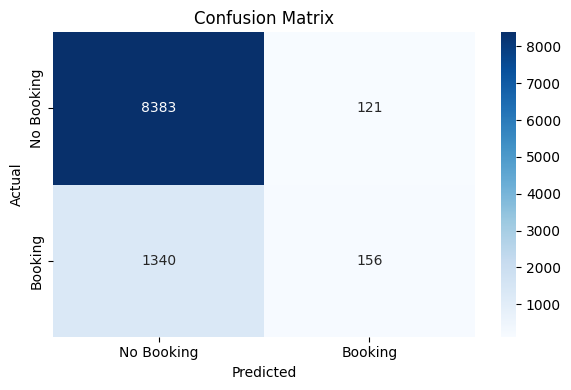

In [51]:
# Import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metrics
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Booking', 'Booking'], yticklabels=['No Booking', 'Booking'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

The model is heavily biased toward predicting "no booking", which is likely because:

- Class 1 (bookings) is **underrepresented** (only ~15% of data).

- This causes the model to favor the majority class.

We will try `SMOTE` to oversample the minority class further and threshold tuning to assess if class imbalance problem can be handled or not.

In [ ]:
# Import SMOTE and additional evaluation metrics
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE

In [53]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [54]:
# Re-train Random Forest model
model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [55]:
# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

In [56]:
# Tune threshold using precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = f1.argmax()
best_threshold = thresholds[best_idx]

In [57]:
# Predict using best threshold
y_pred = (y_proba >= best_threshold).astype(int)

# Evaluation
print("Best Threshold:", best_threshold)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Best Threshold: 0.3791907939960229

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      8504
           1       0.30      0.64      0.41      1496

    accuracy                           0.73     10000
   macro avg       0.61      0.69      0.62     10000
weighted avg       0.83      0.73      0.76     10000



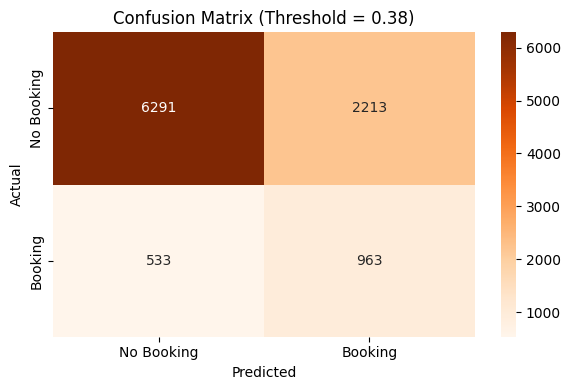

In [58]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Booking', 'Booking'],
            yticklabels=['No Booking', 'Booking'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {best_threshold:.2f})')
plt.tight_layout()
plt.show()

**Interpretation:**

- The model now **_captures 64% of actual bookings_** (compared to just 9% before).

- This is a much more **_actionable model_** in a business context (e.g., targeting potential bookers).

- False positives increased (more non-bookings predicted as bookings), but this is a **_fair trade_** if you want to capture more actual bookings.

### **Present business insights**

1. 🎯 Personalize by Region

    - Customers from different origins behave differently — tailor pricing, UX, or campaigns by `booking_origin`.

2. ✈️ Target High-Conversion Routes

    - Focus marketing and A/B testing on routes with high booking conversion potential.

3. 🕒 Nudge Based on Timing

    - Use `purchase_lead`, `flight_hour`, and `flight_day` to time reminders or upsells more effectively.

4. 📦 Add-On Engagement = Booking Intent

    - Customers who engage with **extras** (meals, baggage) are more likely to convert — consider showing them booking incentives or loyalty prompts.